In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
for i in df.columns:
    print(df[i].value_counts())

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
27808.72510    1
1826.84300    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
numeric_cols = df.select_dtypes(include=['int','float'])

In [ ]:
numeric_cols

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


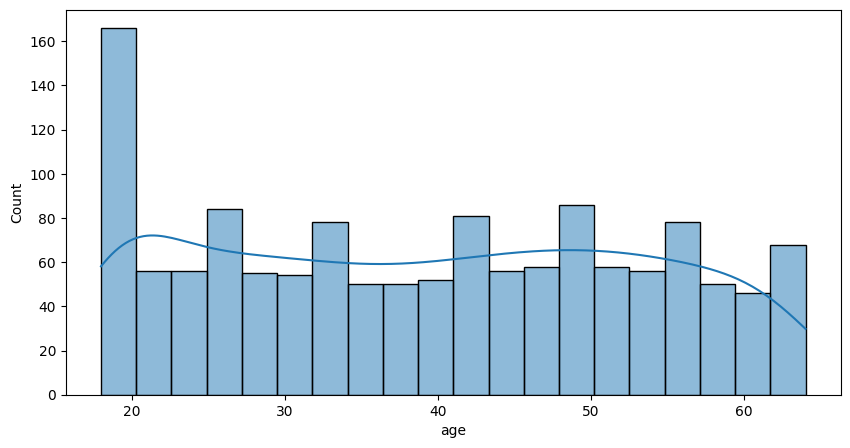

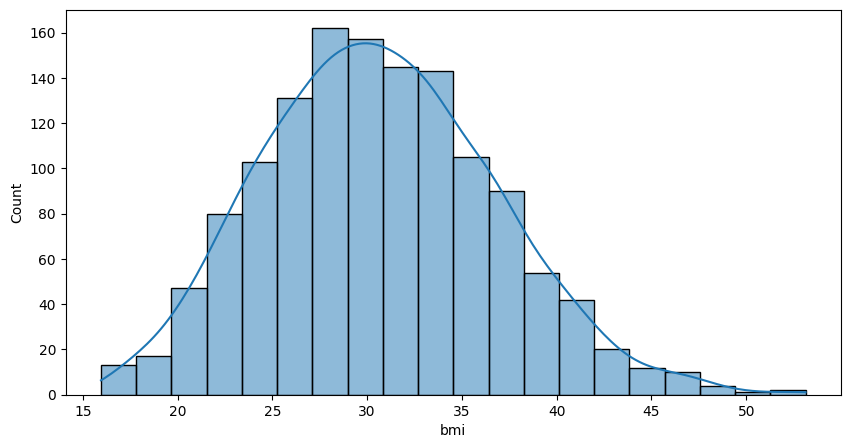

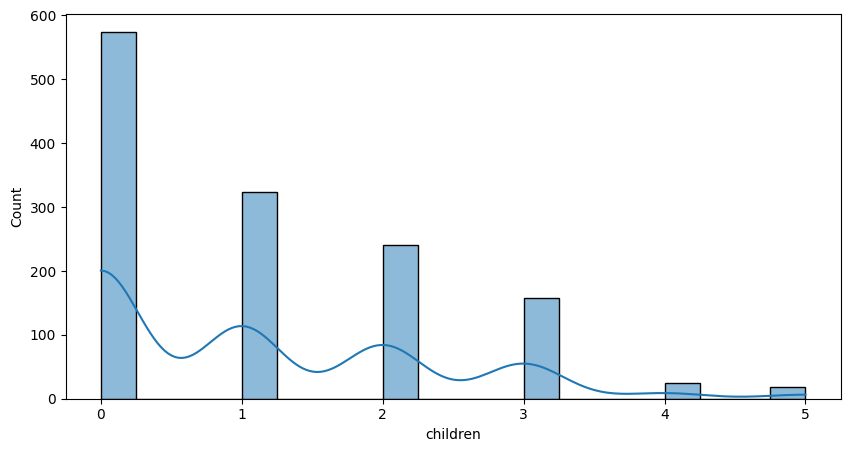

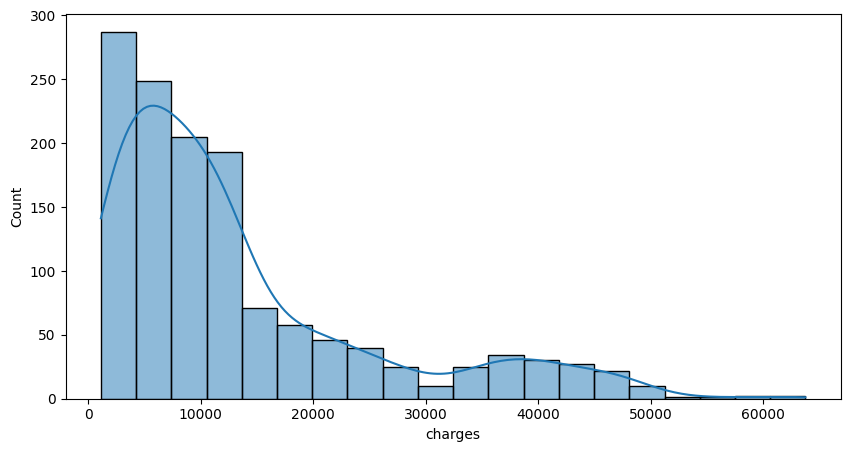

In [ ]:
for i in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(numeric_cols[i],kde=True, bins = 20)

In [ ]:
cate_cols = df.select_dtypes(include=['object'])

In [ ]:
cate_cols

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


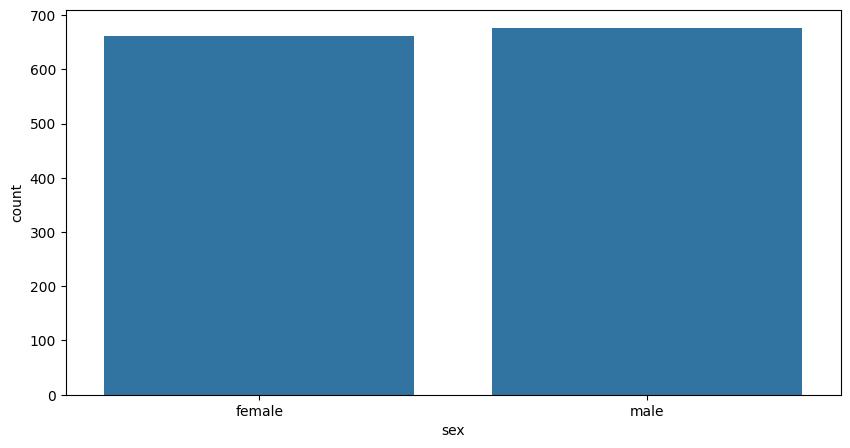

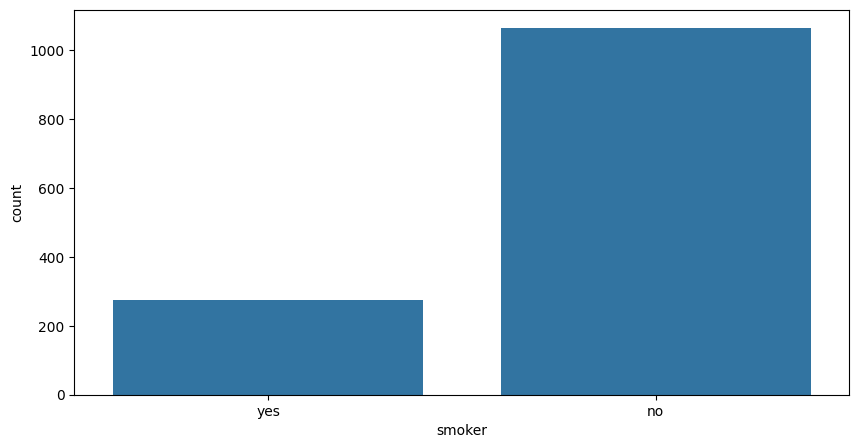

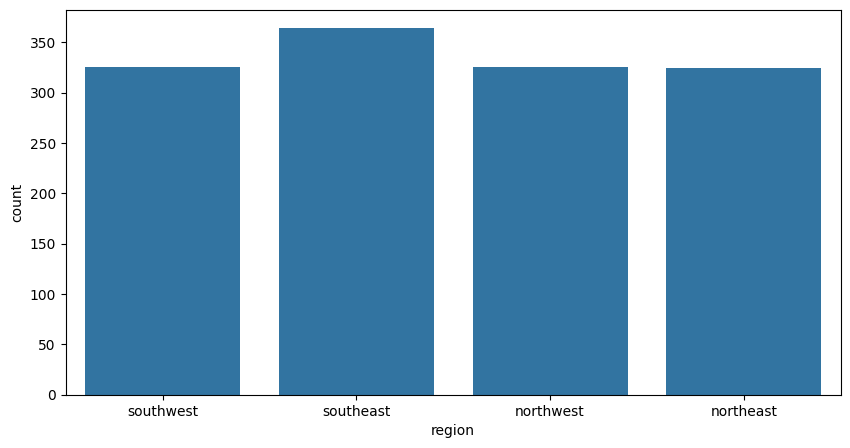

In [ ]:
for i in cate_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x = cate_cols[i])

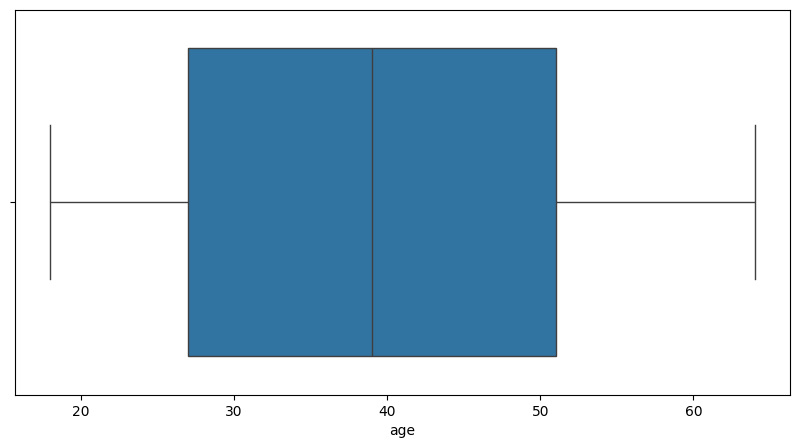

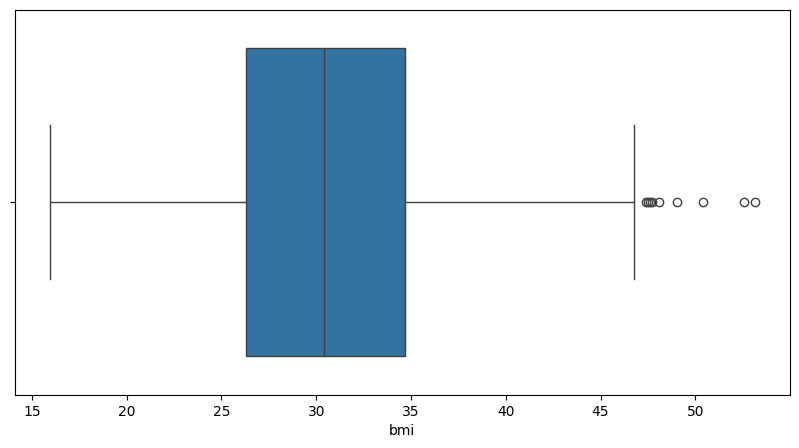

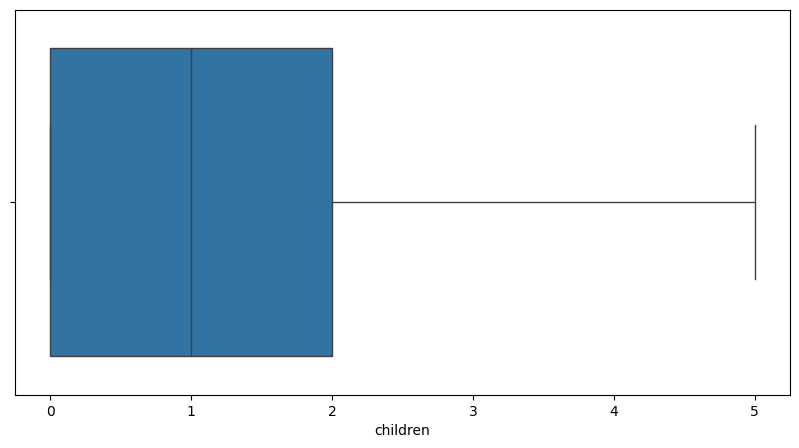

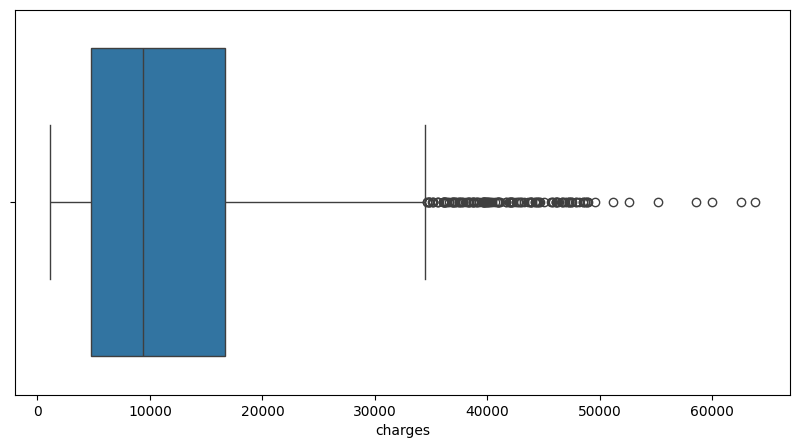

In [ ]:
for i in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x= numeric_cols[i])

<Axes: >

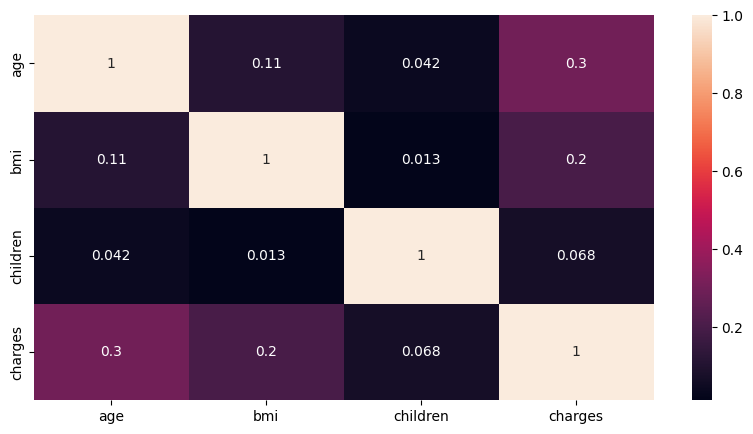

In [ ]:
# correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Data Clearning and preprocessing

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male':1,"female":0})

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [ ]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes' : 1,"no":0})

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df_cleaned.rename(columns={'sex':'Gender'},inplace=True)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   Gender    1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [ ]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [ ]:
# lets use onehot encoding

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [ ]:
df_cleaned

,age,Gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [ ]:
df_cleaned = df_cleaned.astype('int')

In [ ]:
df_cleaned

,age,Gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1


## Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

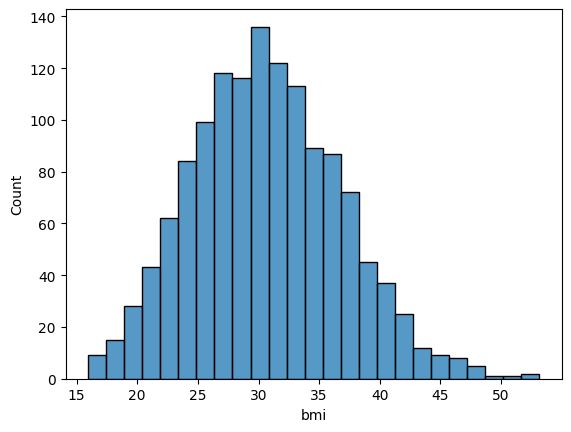

In [ ]:
sns.histplot(df['bmi'])

In [ ]:
df_cleaned['bmi category'] = pd.cut(
    df_cleaned['bmi'],
    bins = [0,18.5,24.9,29.9,float('inf')],
    labels = ['Underweight','Normal','Overweight','Obese'
        ]

)

In [ ]:
df_cleaned

,age,Gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi category
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obese
2,28,1,33,3,0,4449,0,1,0,Obese
3,33,1,22,0,0,21984,1,0,0,Normal
4,32,1,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,Obese
1334,18,0,31,0,0,2205,0,0,0,Obese
1335,18,0,36,0,0,1629,0,1,0,Obese
1336,21,0,25,0,0,2007,0,0,1,Overweight


In [ ]:
df_cleaned.rename(columns={'bmi category':'Bmi_category'},inplace= True)

In [ ]:
df_cleaned.head()

,age,Gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obese
2,28,1,33,3,0,4449,0,1,0,Obese
3,33,1,22,0,0,21984,1,0,0,Normal
4,32,1,28,0,0,3866,1,0,0,Overweight


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['Bmi_category'],drop_first=True)

In [ ]:
df_cleaned.head()

,age,Gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overweight,Bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,False,True,False
1,18,1,33,1,0,1725,0,1,0,False,False,True
2,28,1,33,3,0,4449,0,1,0,False,False,True
3,33,1,22,0,0,21984,1,0,0,True,False,False
4,32,1,28,0,0,3866,1,0,0,False,True,False


In [ ]:
df_cleaned=df_cleaned.astype(int)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['age','bmi','children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [ ]:
df_cleaned

,age,Gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,Bmi_category_Normal,Bmi_category_Overweight,Bmi_category_Obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,0,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


In [ ]:
df_cleaned[cols]

,age,bmi,children
0,-1.440418,-0.517949,-0.909234
1,-1.511647,0.462463,-0.079442
2,-0.799350,0.462463,1.580143
3,-0.443201,-1.334960,-0.909234
4,-0.514431,-0.354547,-0.909234
...,...,...,...
1333,0.767704,-0.027743,1.580143
1334,-1.511647,0.135659,-0.909234
1335,-1.511647,0.952670,-0.909234
1336,-1.297958,-0.844753,-0.909234
